<a href="https://colab.research.google.com/github/Fabian-LG/RedNeuronal-prediccion/blob/main/ejemplo_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from random import randint

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data2.csv', encoding= 'unicode_escape')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   O2                129 non-null    float64
 1   T¡C               129 non-null    float64
 2   SAL               129 non-null    float64
 3   PH                129 non-null    float64
 4   Biomasa           129 non-null    int64  
 5   ALIMENTO SEMANAL  129 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 6.2 KB


In [ ]:
data

,O2,T¡C,SAL,PH,Biomasa,ALIMENTO SEMANAL
0,3.40,30.45,38.0,8.7,11351,1100
1,3.63,30.73,35.0,8.7,7966,1150
2,3.31,30.99,37.0,8.8,5648,775
3,3.43,30.95,35.0,8.7,6637,1325
4,3.80,30.95,38.0,8.7,5889,1000
...,...,...,...,...,...,...
124,3.35,28.80,37.0,8.1,10518,1825
125,3.68,28.66,36.0,8.2,8009,2775
126,3.53,28.75,38.0,8.4,9774,2625
127,3.92,28.73,38.0,8.3,7838,3275


In [ ]:
data.columns

Index(['O2', 'T¡C', 'SAL', 'PH', 'Biomasa', 'ALIMENTO SEMANAL'], dtype='object')

In [ ]:
train_data = data.loc[:,['O2', 'T¡C', 'SAL', 'PH', 'Biomasa']]
train_data

,O2,T¡C,SAL,PH,Biomasa
0,3.40,30.45,38.0,8.7,11351
1,3.63,30.73,35.0,8.7,7966
2,3.31,30.99,37.0,8.8,5648
3,3.43,30.95,35.0,8.7,6637
4,3.80,30.95,38.0,8.7,5889
...,...,...,...,...,...
124,3.35,28.80,37.0,8.1,10518
125,3.68,28.66,36.0,8.2,8009
126,3.53,28.75,38.0,8.4,9774
127,3.92,28.73,38.0,8.3,7838


In [ ]:
#train_data = train_data.iloc[:,[(int(len(train_data))*0.8)]]
train_data = train_data.iloc[:(int(int(len(train_data))*0.8)), :]
train_data

,O2,T¡C,SAL,PH,Biomasa
0,3.40,30.45,38.0,8.7,11351
1,3.63,30.73,35.0,8.7,7966
2,3.31,30.99,37.0,8.8,5648
3,3.43,30.95,35.0,8.7,6637
4,3.80,30.95,38.0,8.7,5889
...,...,...,...,...,...
98,3.77,30.63,38.0,8.2,4977
99,3.30,29.10,39.0,8.9,8433
100,3.20,29.20,39.0,8.9,8235
101,3.00,29.50,40.0,8.9,7806


In [ ]:
test_data = data.loc[:,['O2', 'T¡C', 'SAL', 'PH', 'Biomasa']]
test_data

,O2,T¡C,SAL,PH,Biomasa
0,3.40,30.45,38.0,8.7,11351
1,3.63,30.73,35.0,8.7,7966
2,3.31,30.99,37.0,8.8,5648
3,3.43,30.95,35.0,8.7,6637
4,3.80,30.95,38.0,8.7,5889
...,...,...,...,...,...
124,3.35,28.80,37.0,8.1,10518
125,3.68,28.66,36.0,8.2,8009
126,3.53,28.75,38.0,8.4,9774
127,3.92,28.73,38.0,8.3,7838


In [ ]:
test_data = test_data.iloc[(int(int(len(test_data))*0.8)):, :]
test_data

,O2,T¡C,SAL,PH,Biomasa
103,3.10,29.40,39.0,8.9,8370
104,3.34,29.16,40.0,9.7,4355
105,2.93,29.00,40.0,9.7,4983
106,3.26,28.73,40.0,9.7,4979
107,3.17,28.89,40.0,9.7,4289
108,3.17,28.93,40.0,9.7,4675
109,3.78,30.43,37.0,8.3,6556
110,3.50,30.53,36.0,8.3,5081
111,3.54,30.57,36.0,8.3,5380
112,3.66,30.30,36.0,8.3,6104


In [ ]:
train_data=(train_data - train_data.min() )/ (train_data.max()-train_data.min())
train_data

,O2,T¡C,SAL,PH,Biomasa
0,0.006137,0.119153,0.375,0.500000,1.000000
1,0.006900,0.143866,0.000,0.500000,0.674394
2,0.005838,0.166814,0.250,0.541667,0.451424
3,0.006237,0.163283,0.000,0.500000,0.546556
4,0.007464,0.163283,0.375,0.500000,0.474606
...,...,...,...,...,...
98,0.007364,0.135040,0.375,0.291667,0.386880
99,0.005805,0.000000,0.500,0.583333,0.719315
100,0.005474,0.008826,0.500,0.583333,0.700269
101,0.004810,0.035305,0.625,0.583333,0.659003


In [ ]:
test_data = (test_data - test_data.min() )/ (test_data.max()-test_data.min())
test_data

,O2,T¡C,SAL,PH,Biomasa
103,0.254658,0.561798,0.75,0.529412,0.541534
104,0.403727,0.471910,1.00,1.000000,0.008758
105,0.149068,0.411985,1.00,1.000000,0.092091
106,0.354037,0.310861,1.00,1.000000,0.091561
107,0.298137,0.370787,1.00,1.000000,0.000000
108,0.298137,0.385768,1.00,1.000000,0.051221
109,0.677019,0.947566,0.25,0.176471,0.300823
110,0.503106,0.985019,0.00,0.176471,0.105096
111,0.527950,1.000000,0.00,0.176471,0.144772
112,0.602484,0.898876,0.00,0.176471,0.240844


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   O2       103 non-null    float64
 1   T¡C      103 non-null    float64
 2   SAL      103 non-null    float64
 3   PH       103 non-null    float64
 4   Biomasa  103 non-null    float64
dtypes: float64(5)
memory usage: 4.1 KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 103 to 128
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   O2       26 non-null     float64
 1   T¡C      26 non-null     float64
 2   SAL      26 non-null     float64
 3   PH       26 non-null     float64
 4   Biomasa  26 non-null     float64
dtypes: float64(5)
memory usage: 1.1 KB


In [ ]:
target_data_t = data.loc[:,['ALIMENTO SEMANAL']]

In [ ]:
target_data_t = target_data_t.iloc[:(int(int(len(target_data_t))*0.8)), :]
target_data_t

,ALIMENTO SEMANAL
0,1100
1,1150
2,775
3,1325
4,1000
...,...
98,1125
99,2850
100,2675
101,2750


In [ ]:
target_data_t=(target_data_t - target_data_t.min() )/ (target_data_t.max()-target_data_t.min())
target_data_t

,ALIMENTO SEMANAL
0,0.332784
1,0.349259
2,0.225700
3,0.406919
4,0.299835
...,...
98,0.341021
99,0.909390
100,0.851730
101,0.876442


In [ ]:
target_data_v = data.loc[:,['ALIMENTO SEMANAL']]

In [ ]:
target_data_v = target_data_v.iloc[(int(int(len(target_data_v))*0.8)):, :]

In [ ]:
target_data_v=(target_data_v - target_data_v.min() )/ (target_data_v.max()-target_data_v.min())
target_data_v

,ALIMENTO SEMANAL
103,0.629921
104,0.000000
105,0.448819
106,0.259843
107,0.275591
108,0.314961
109,0.362205
110,0.275591
111,0.385827
112,0.299213


In [ ]:
train_data.shape

(103, 5)

In [ ]:
target_data_t.shape

(103, 1)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_MAE',patience=2, mode='min')

#se detiene después de 2 datos consecutivos que suben / evitar overfitting


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(5))) #Input layer
model.add(tf.keras.layers.Flatten())

#Hidden layers
#model.add(tf.keras.layers.Dense(10, activation=None)) #Linear
model.add(tf.keras.layers.Dense(8, activation='relu'))

#model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2()))#Non-linear
model.add(tf.keras.layers.Dense(1, activation=None, kernel_regularizer=tf.keras.regularizers.L2())) #Output layer

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
            metrics=['MAE'],
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 8)                 48        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#history = model.fit(train_data, target_data_t, batch_size=1, epochs=100, validation_data=(test_data, target_data_v), callbacks=[early_stopping])
history = model.fit(train_data, target_data_t, batch_size=1, epochs=100, validation_data=(test_data, target_data_v))

Epoch 1/100
103/103 [==============================] - 1s 7ms/step - loss: 0.1966 - MAE: 0.3401 - val_loss: 0.2245 - val_MAE: 0.3248
Epoch 2/100
103/103 [==============================] - 0s 4ms/step - loss: 0.1652 - MAE: 0.3003 - val_loss: 0.2279 - val_MAE: 0.3286
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 0.1417 - MAE: 0.2688 - val_loss: 0.2343 - val_MAE: 0.3382
Epoch 4/100
103/103 [==============================] - 0s 4ms/step - loss: 0.1252 - MAE: 0.2465 - val_loss: 0.2424 - val_MAE: 0.3454
Epoch 5/100
103/103 [==============================] - 0s 4ms/step - loss: 0.1132 - MAE: 0.2277 - val_loss: 0.2489 - val_MAE: 0.3520
Epoch 6/100
103/103 [==============================] - 0s 3ms/step - loss: 0.1049 - MAE: 0.2169 - val_loss: 0.2554 - val_MAE: 0.3580
Epoch 7/100
103/103 [==============================] - 0s 3ms/step - loss: 0.0987 - MAE: 0.2070 - val_loss: 0.2598 - val_MAE: 0.3627
Epoch 8/100
103/103 [==============================] - 0s 5ms/step - 

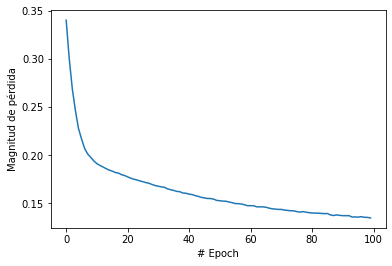

In [ ]:
plt.xlabel("# Epoch")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["MAE"])

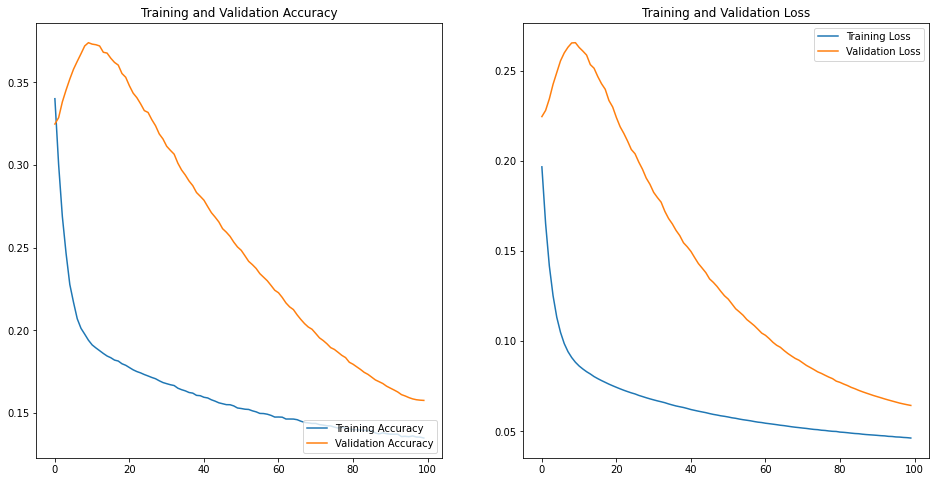

In [ ]:
acc = history.history['MAE']
val_acc = history.history['val_MAE']

#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#model.evaluate(test_images, test_labels)

80% para entrenamiento
20% para validación


10000
80%
10%
10%


1000000
98% entrenamiento
1%
1%